# Lab | Avila Bible 

In this lab, we will explore the [**Avila Bible dataset**](https://archive.ics.uci.edu/ml/datasets/Avila) which has been extracted from 800 images of the 'Avila Bible', an XII century giant Latin copy of the Bible. The prediction task consists in associating each pattern to a copyist. You will use supervised learning algorithms to figure out what feature patterns each copyist are likely to have and use our model to predict those copyist.

-----------------------------------------------------------------------------------------------------------------

## Before your start:
    - Comment as much as you can and use the APIla-bible in the README.md,
    - Happy learning!

In [37]:
# Import your libraries
import pandas as pd
import requests
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix


![machine-learning](https://miro.medium.com/proxy/1*halC1X4ydv_3yHYxKqvrwg.gif)

The Avila data set has been extracted from 800 images of the the **Avila Bible**, a giant Latin copy of the whole Bible produced during the XII century between Italy and Spain. The palaeographic analysis of the  manuscript has  individuated the presence of 8 copyists. The pages written by each copyist are not equally numerous. 
Each pattern contains 10 features and corresponds to a group of 4 consecutive rows.

# What am I expected to do?

Well, your prediction task consists in associating each pattern to one of the 8 monks we will be evaluating (labeled as:  Marcus, Clarius, Philippus, Coronavirucus, Mongucus, Paithonius, Ubuntius, Esequlius). For that aim, you should: 
- Train a minimum of 4 different models
- Must contain a summary of the machine learning tools and algorithms
- and the results or the score obtained with each of them

You won't get much more instructions from now on. Remember to comment your code as much as you can. Keep the requirements in mind and have fun! 

## Dataset

In [2]:
data = pd.read_csv('../data/training_dataset.csv', index_col=0)

In [3]:
data.head(20)

,0,1,2,3,4,5,6,7,8,9,10
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus
5,-0.412837,-0.346197,0.601936,2.211191,0.440474,0.356414,-1.138838,1.623671,2.371513,1.346221,Mongucus
6,0.056229,0.187683,-0.031104,-0.958476,0.261718,-0.598658,0.861934,-0.885246,-0.528364,-0.848946,Clarius
7,-0.128929,-0.032150,0.068476,-0.151655,-0.989576,-0.806282,0.295677,0.259758,0.251173,-0.767984,Clarius
8,0.130292,-0.275537,0.274747,-0.574878,0.261718,2.889429,0.635431,-1.180749,-0.840179,2.303929,Marcus
9,0.080916,0.438921,0.143160,-0.523288,0.261718,-0.598658,0.106925,-0.641641,0.188810,-0.491704,Ubuntius


`Keep calm and code on!`

## Explore Data

In [4]:
data.shape

(12017, 11)

In [5]:
# Your code
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12017 entries, 0 to 12016
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       12017 non-null  float64
 1   1       12017 non-null  float64
 2   2       12017 non-null  float64
 3   3       12017 non-null  float64
 4   4       12017 non-null  float64
 5   5       12017 non-null  float64
 6   6       12017 non-null  float64
 7   7       12017 non-null  float64
 8   8       12017 non-null  float64
 9   9       12017 non-null  float64
 10  10      12017 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.1+ MB


<AxesSubplot:xlabel='count', ylabel='10'>

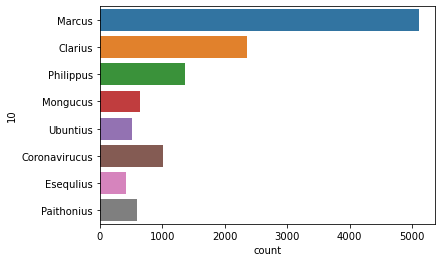

In [137]:
sns.countplot(y=data['10'])

# Challenge - train your models, make the best prediction

### Label encoder 
Encode target labels with value between 0 and n_classes-1.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html

In [8]:
le = preprocessing.LabelEncoder()
data["numeric"] = le.fit_transform(data["10"])

In [9]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,numeric
0,0.241386,0.109171,-0.127126,0.380626,0.172340,0.314889,0.484429,0.316412,0.188810,0.134922,Marcus,3
1,0.303106,0.352558,0.082701,0.703981,0.261718,-0.391033,0.408929,1.045014,0.282354,-0.448209,Clarius,0
2,-0.116585,0.281897,0.175168,-0.152490,0.261718,-0.889332,0.371178,-0.024328,0.905984,-0.877830,Philippus,6
3,-0.326430,-0.652394,0.384996,-1.694222,-0.185173,-1.138481,-0.232828,-1.747116,-1.183175,-0.807380,Philippus,6
4,-0.437525,-0.471816,0.463236,-0.545248,0.261718,-0.972381,0.824183,-3.108388,-2.991700,-1.141030,Philippus,6


In [10]:
columnas = [a for a in data.columns if a not in ["10","numeric"]]
X = data[columnas]
y = data["numeric"]

### Train_Test Split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

In [12]:
X_train.shape

(9613, 10)

In [13]:
y_train.shape

(9613,)

In [15]:
X_test.shape

(2404, 10)

In [16]:
y_test.shape

(2404,)

### Train One Model

Classifier implementing the k-nearest neighbors vote. https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [132]:
neigh = KNeighborsClassifier(n_neighbors=1)

In [133]:
neigh.fit(X_train, y_train)

KNeighborsClassifier()

In [134]:
y_pred = neigh.predict(X_test)

In [135]:
y_pred

array([7, 0, 3, ..., 5, 6, 3])

### Exploring metrics for multi-class classification algorithms
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

- Accuracy
- Precission
- Recall
- F1_score

In [116]:
#n=1
print("Accuracy", (accuracy_score(y_test, y_pred)))
print("Precission", (precision_score(y_test, y_pred, average='weighted')))
print("Recall", (recall_score(y_test, y_pred, average='weighted')))
print("F1_score", (f1_score(y_test, y_pred, average='weighted')))

Accuracy 0.7616472545757071
Precission 0.7621270134507959
Recall 0.7616472545757071
F1_score 0.761524835438531


In [121]:
#n=2
print("Accuracy", (accuracy_score(y_test, y_pred)))
print("Precission", (precision_score(y_test, y_pred, average='weighted')))
print("Recall", (recall_score(y_test, y_pred, average='weighted')))
print("F1_score", (f1_score(y_test, y_pred, average='weighted')))

Accuracy 0.7250415973377704
Precission 0.7533891306831967
Recall 0.7250415973377704
F1_score 0.7259016755400226


In [126]:
#n=3
print("Accuracy", (accuracy_score(y_test, y_pred)))
print("Precission", (precision_score(y_test, y_pred, average='weighted')))
print("Recall", (recall_score(y_test, y_pred, average='weighted')))
print("F1_score", (f1_score(y_test, y_pred, average='weighted')))

Accuracy 0.7450083194675541
Precission 0.7496564728747055
Recall 0.7450083194675541
F1_score 0.7445228411709801


In [131]:
#n=4
print("Accuracy", (accuracy_score(y_test, y_pred)))
print("Precission", (precision_score(y_test, y_pred, average='weighted')))
print("Recall", (recall_score(y_test, y_pred, average='weighted')))
print("F1_score", (f1_score(y_test, y_pred, average='weighted')))

Accuracy 0.737936772046589
Precission 0.7493413503692921
Recall 0.737936772046589
F1_score 0.7391102058047914


In [136]:
#n=5
print("Accuracy", (accuracy_score(y_test, y_pred)))
print("Precission", (precision_score(y_test, y_pred, average='weighted')))
print("Recall", (recall_score(y_test, y_pred, average='weighted')))
print("F1_score", (f1_score(y_test, y_pred, average='weighted')))

Accuracy 0.7396006655574043
Precission 0.7430829539566314
Recall 0.7396006655574043
F1_score 0.7375033719805072


### Training several models and explores the metrics for each of them

- DecisionTreeClassifier
- SVC
- RandomForestClassifier
- AdaBoostClassifier


In [138]:
# Your Code

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [139]:
models = {"tree": DecisionTreeClassifier(),
          "forest": RandomForestClassifier(),
          "ada": AdaBoostClassifier(),
          "svc": SVC()
}

In [140]:
for name, model in models.items():
    print(f"Entrenando ---> {name}")
    model.fit(X_train, y_train)
    print(f"He acabado ---> {name}")

Entrenando ---> tree
He acabado ---> tree
Entrenando ---> forest
He acabado ---> forest
Entrenando ---> ada
He acabado ---> ada
Entrenando ---> svc
He acabado ---> svc


In [142]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f"----{name}---")
    print("Accuracy", (accuracy_score(y_test, y_pred)))
    print("Precission", (precision_score(y_test, y_pred, average='weighted')))
    print("Recall", (recall_score(y_test, y_pred, average='weighted')))
    print("F1_score", (f1_score(y_test, y_pred, average='weighted')))

----tree---
Accuracy 0.9721297836938436
Precission 0.9722670798257177
Recall 0.9721297836938436
F1_score 0.9721540862453333
----forest---
Accuracy 0.9896006655574043
Precission 0.9896260145232892
Recall 0.9896006655574043
F1_score 0.9895743188605196
----ada---
Accuracy 0.5124792013311148
Precission 0.3402392930902178
Recall 0.5124792013311148
F1_score 0.3645968428394853


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----svc---
Accuracy 0.7387687188019967
Precission 0.7452280569102314
Recall 0.7387687188019967
F1_score 0.7220691197871628


![hope-you-enjoy](https://imgs.xkcd.com/comics/machine_learning.png)